<a href="https://colab.research.google.com/github/roger-telecom/Machine-Learning-and-Data-Science/blob/main/Redes_neurais_para_regress%C3%A3o_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Na regressão linear, a ideia é associar duas varíaveis de forma que tenha um modelo entre as variáveis de entrada e saída que estão interceptando a reta de regressão linear. A regressão linear é muito utilizada para bias e variâncias pequenas.

In [39]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

'2.8.2'

In [40]:
bike = pd.read_csv('bike-sharing-daily.csv')

In [41]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600


In [42]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [43]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 85.8+ KB


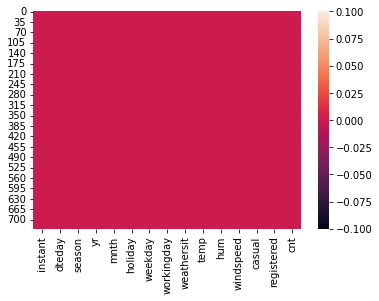

In [44]:
sns.heatmap(bike.isnull());

In [45]:
#foi feito um drop em instant

bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600


In [46]:
bike = bike.drop(labels=['casual', 'registered'], axis = 1)

In [47]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [ ]:
bike.dteday = pd.to_datetime(bike.dteday, format = '%m/%d/%Y')

In [49]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [50]:
bike.index = pd.DatetimeIndex(bike.dteday)

In [54]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,,,
2011-01-01,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


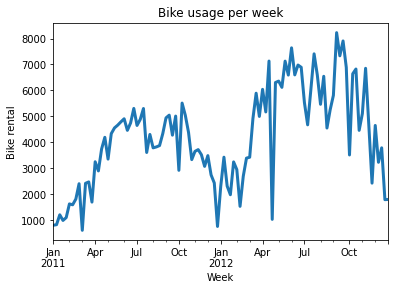

In [55]:
bike['cnt'].asfreq('W').plot(linewidth = 3)
plt.title('Bike usage per week')
plt.xlabel('Week')
plt.ylabel('Bike rental');

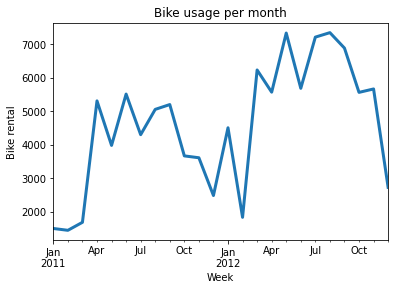

In [56]:
bike['cnt'].asfreq('M').plot(linewidth = 3)
plt.title('Bike usage per month')
plt.xlabel('Week')
plt.ylabel('Bike rental');

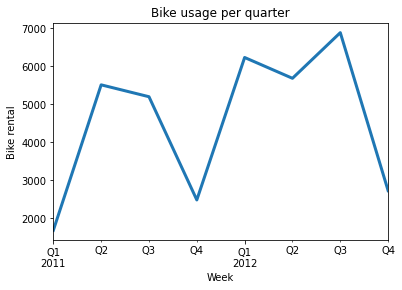

In [57]:
bike['cnt'].asfreq('Q').plot(linewidth = 3)
plt.title('Bike usage per quarter')
plt.xlabel('Week')
plt.ylabel('Bike rental');

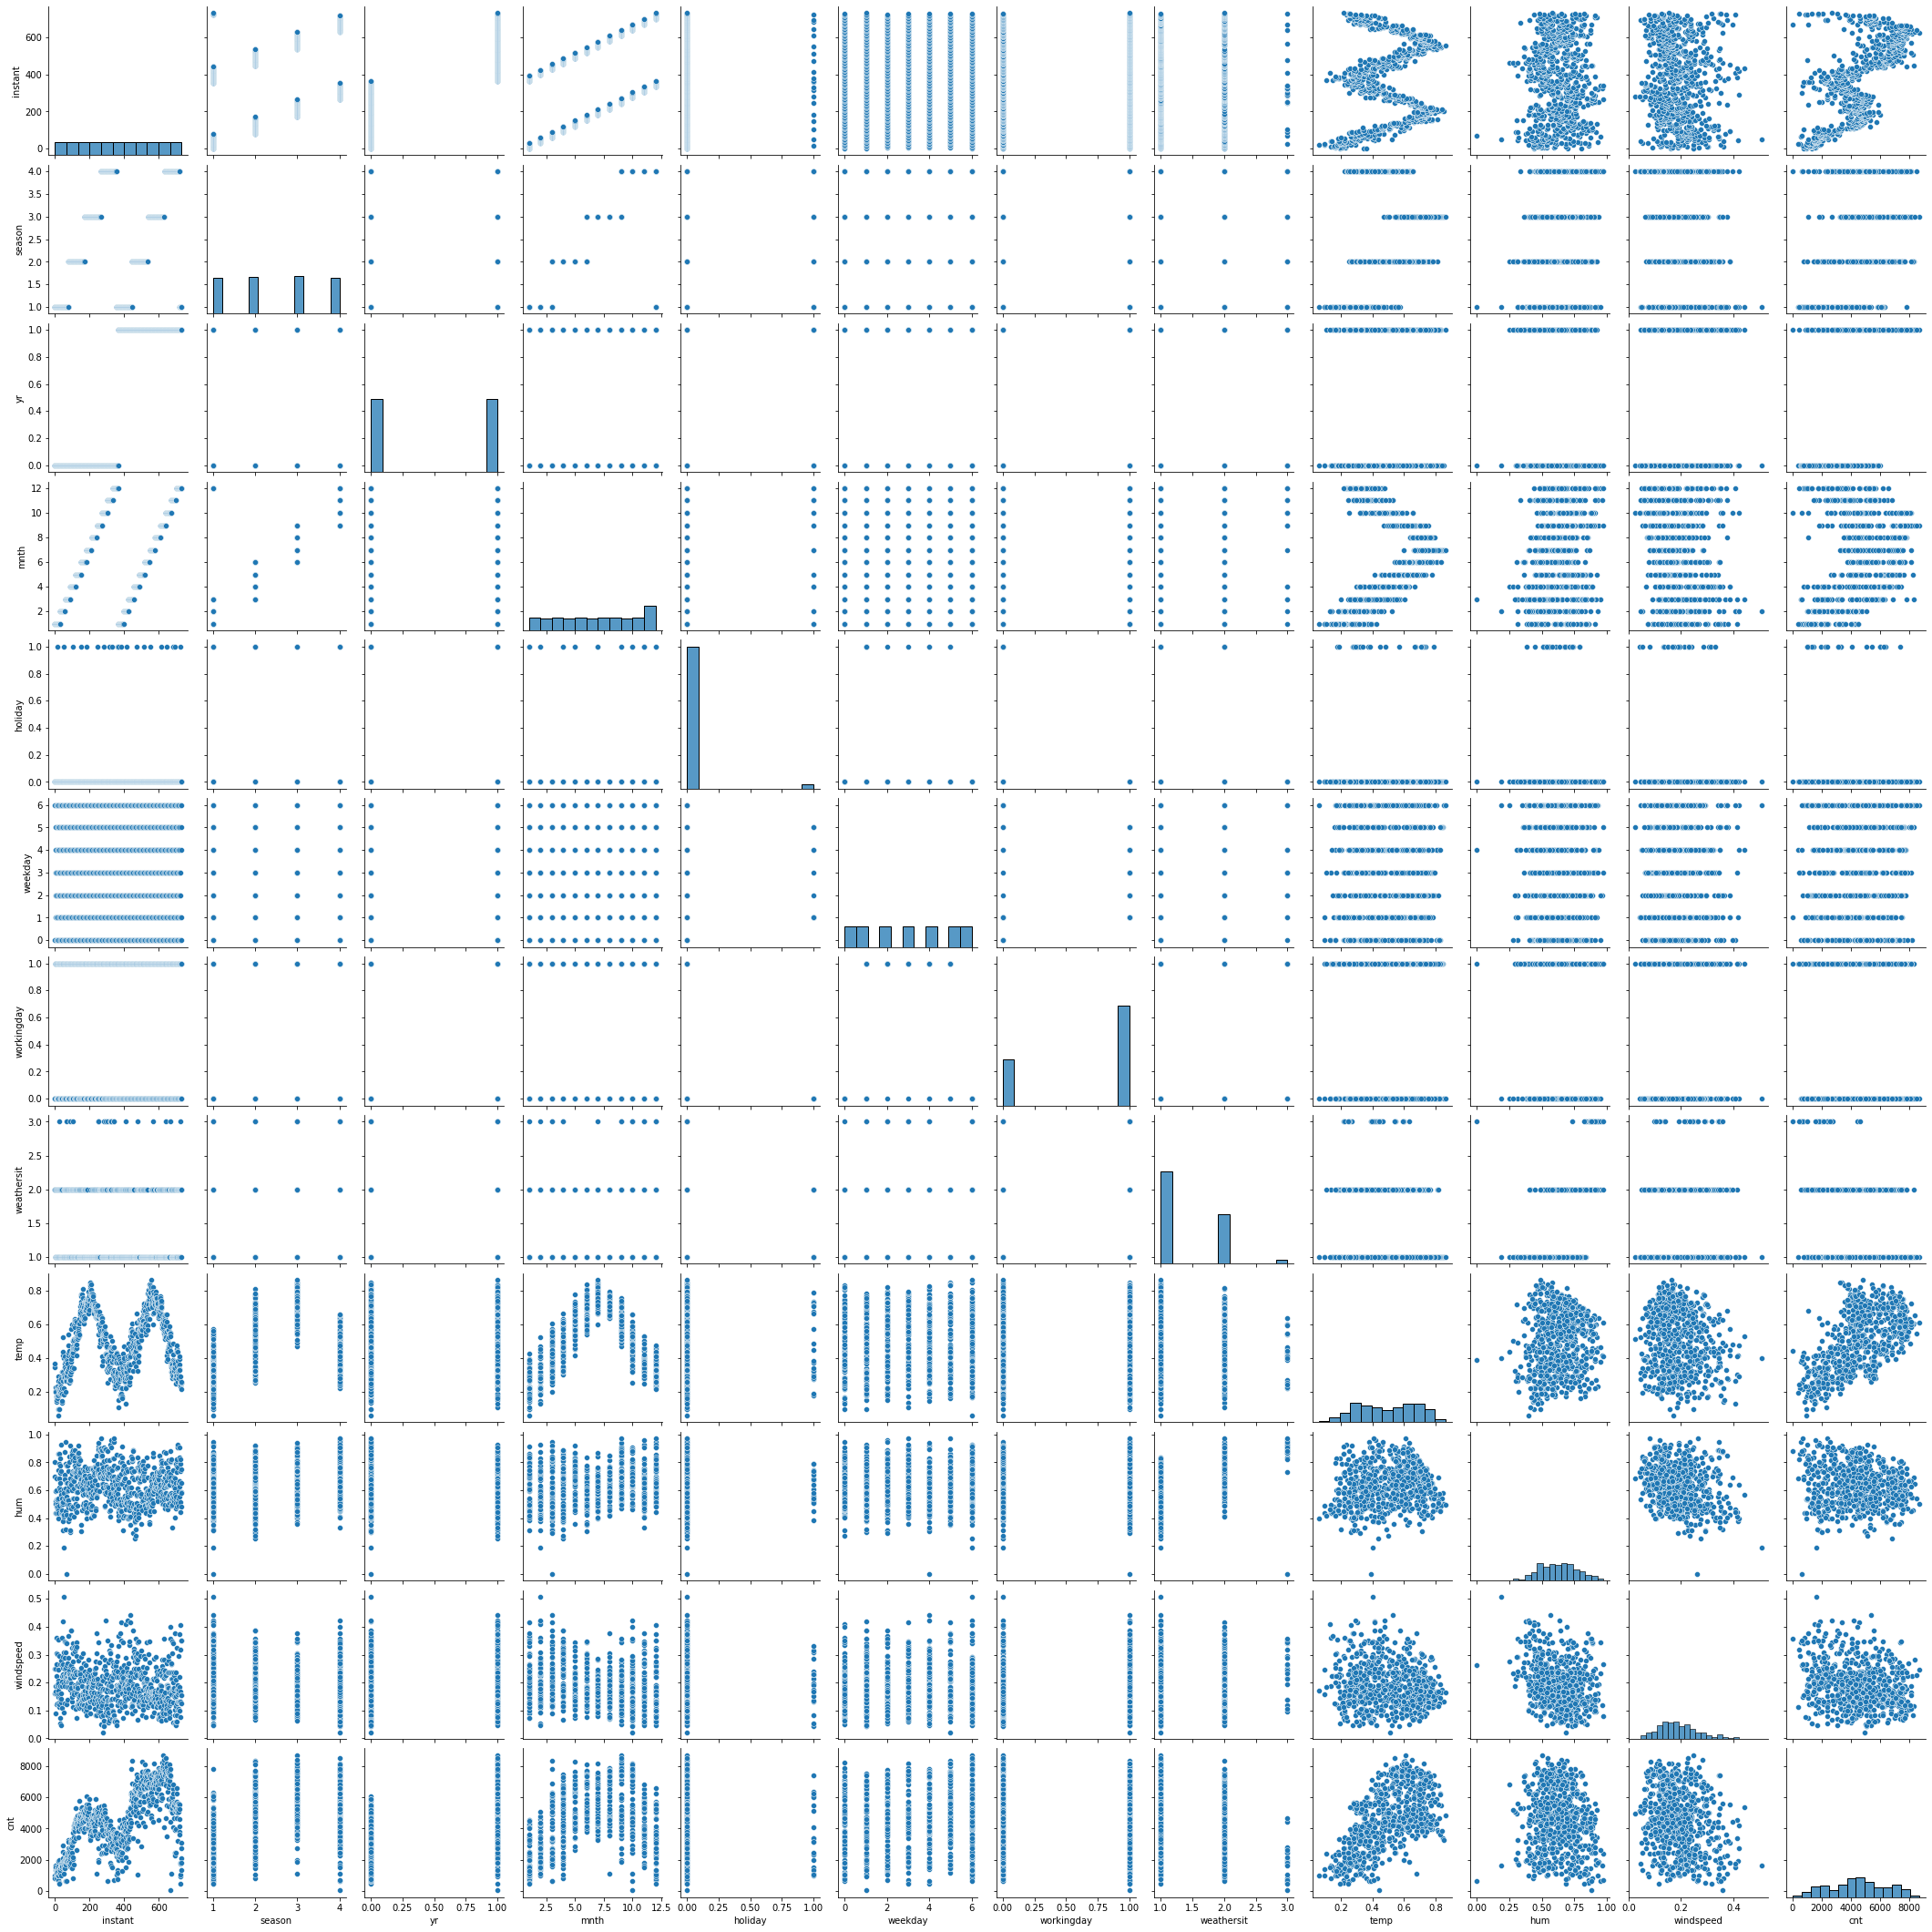

In [58]:
sns.pairplot(bike);

In [59]:
x_numerical = bike[['temp', 'hum', 'windspeed', 'cnt']]
x_numerical.head()

,temp,hum,windspeed,cnt
dteday,,,,
2011-01-01,0.344167,0.805833,0.160446,985
2011-01-02,0.363478,0.696087,0.248539,801
2011-01-03,0.196364,0.437273,0.248309,1349
2011-01-04,0.200000,0.590435,0.160296,1562
2011-01-05,0.226957,0.436957,0.186900,1600


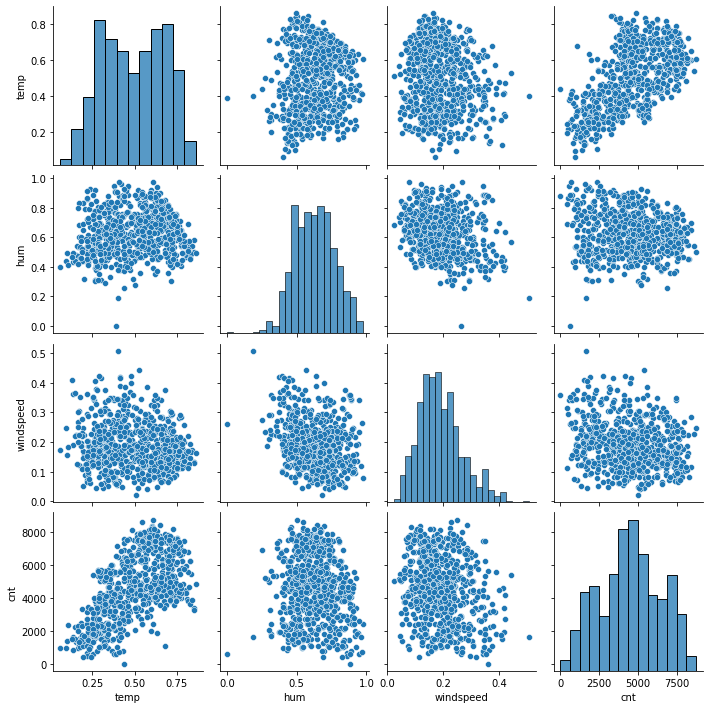

In [60]:
sns.pairplot(x_numerical)

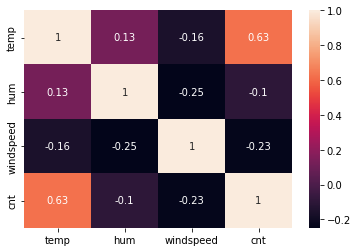

In [61]:
sns.heatmap(X_numerical.corr(), annot = True);

In [62]:
x_cat = bike[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]
x_cat.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit
dteday,,,,,,,
2011-01-01,1,0,1,0,6,0,2
2011-01-02,1,0,1,0,0,0,2
2011-01-03,1,0,1,0,1,1,1
2011-01-04,1,0,1,0,2,1,1
2011-01-05,1,0,1,0,3,1,1


In [63]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
x_cat = onehotencoder.fit_transform(x_cat).toarray()
x_cat

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [64]:
x_cat.shape

(731, 32)

In [65]:
x_cat = pd.DataFrame(x_cat)
x_cat.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [66]:
x_numerical = x_numerical.reset_index()

In [68]:
x_all = pd.concat([x_cat, x_numerical], axis = 1)

In [69]:
x_all = x_all.drop(labels=['dteday'], axis = 1)

In [70]:
x_all.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.226957,0.436957,0.186900,1600


In [72]:
x = x_all.iloc[:, :-1].values
y = x_all.iloc[:, -1:].values

In [74]:
x.shape

(731, 35)

In [75]:
y.shape

(731, 1)

In [77]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y = scaler.fit_transform(y)
y

array([[0.11079153],
       [0.08962264],
       [0.15266912],
       [0.17717441],
       [0.18154625],
       [0.18223654],
       [0.1711919 ],
       [0.10780028],
       [0.09203866],
       [0.14944777],
       [0.14277497],
       [0.13115509],
       [0.15922688],
       [0.1609526 ],
       [0.14104924],
       [0.13598711],
       [0.11251726],
       [0.07604694],
       [0.18729867],
       [0.21916705],
       [0.1749885 ],
       [0.11033134],
       [0.11090658],
       [0.16037736],
       [0.22583985],
       [0.05568339],
       [0.04705476],
       [0.13173033],
       [0.12379199],
       [0.1235619 ],
       [0.17015647],
       [0.15393465],
       [0.17303267],
       [0.17579383],
       [0.19397147],
       [0.1130925 ],
       [0.18419236],
       [0.19443166],
       [0.17349287],
       [0.18212149],
       [0.17441325],
       [0.1983433 ],
       [0.16682006],
       [0.18028072],
       [0.21755637],
       [0.20628164],
       [0.24079613],
       [0.282

In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [80]:
x_train.shape

(584, 35)

In [82]:
x_test.shape

(147, 35)

In [84]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 100, activation='relu', input_shape=(35,)))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               3600      
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 23,901
Trainable params: 23,901
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [87]:
epochs_hist = model.fit(x_train, y_train, epochs = 25, batch_size = 50, validation_split=0.2)

Epoch 1/25
10/10 [==============================] - 1s 16ms/step - loss: 0.0969 - val_loss: 0.0423
Epoch 2/25
10/10 [==============================] - 0s 5ms/step - loss: 0.0306 - val_loss: 0.0264
Epoch 3/25
10/10 [==============================] - 0s 4ms/step - loss: 0.0158 - val_loss: 0.0202
Epoch 4/25
10/10 [==============================] - 0s 4ms/step - loss: 0.0109 - val_loss: 0.0176
Epoch 5/25
10/10 [==============================] - 0s 4ms/step - loss: 0.0090 - val_loss: 0.0165
Epoch 6/25
10/10 [==============================] - 0s 4ms/step - loss: 0.0078 - val_loss: 0.0159
Epoch 7/25
10/10 [==============================] - 0s 4ms/step - loss: 0.0068 - val_loss: 0.0157
Epoch 8/25
10/10 [==============================] - 0s 4ms/step - loss: 0.0062 - val_loss: 0.0149
Epoch 9/25
10/10 [==============================] - 0s 4ms/step - loss: 0.0055 - val_loss: 0.0148
Epoch 10/25
10/10 [==============================] - 0s 4ms/step - loss: 0.0050 - val_loss: 0.0147
Epoch 11/25
10/10 

In [88]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

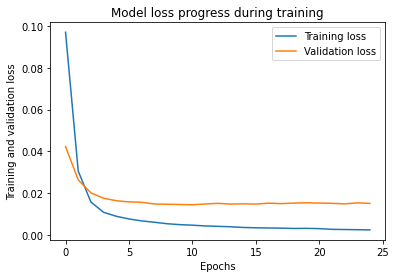

In [89]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model loss progress during training')
plt.xlabel('Epochs')
plt.ylabel('Training and validation loss')
plt.legend(['Training loss', 'Validation loss']);

In [90]:
y_predict = model.predict(x_test)
y_predict

array([[0.60541075],
       [0.56840724],
       [0.29601482],
       [0.2958563 ],
       [0.75808364],
       [0.17671973],
       [0.2082282 ],
       [0.52834797],
       [0.18568966],
       [0.8004232 ],
       [0.22740448],
       [0.07763596],
       [0.65871364],
       [0.6843097 ],
       [0.6787501 ],
       [0.6605255 ],
       [0.6409672 ],
       [0.8477494 ],
       [0.8034146 ],
       [0.4862644 ],
       [0.7060352 ],
       [0.583517  ],
       [0.72968644],
       [0.6353337 ],
       [0.4648414 ],
       [0.5760599 ],
       [0.6334911 ],
       [0.5257724 ],
       [0.47891214],
       [0.45954192],
       [0.3876525 ],
       [0.8538119 ],
       [0.13474908],
       [0.09482899],
       [0.5758075 ],
       [0.3153739 ],
       [0.6095194 ],
       [0.7960644 ],
       [0.25130767],
       [0.6822887 ],
       [0.4666667 ],
       [0.5064922 ],
       [0.43047535],
       [0.53966963],
       [0.40409246],
       [0.20646188],
       [0.50542396],
       [0.768

Text(0, 0.5, 'True values')

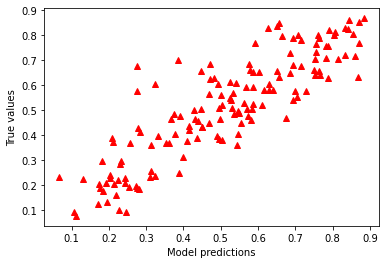

In [91]:
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model predictions')
plt.ylabel('True values')

In [92]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

Text(0, 0.5, 'True values')

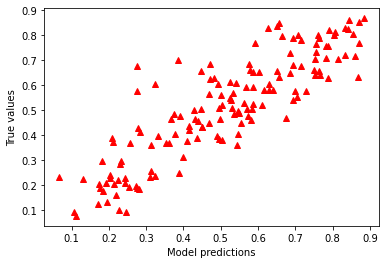

In [93]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model predictions')
plt.ylabel('True values')

In [95]:
k = x_test.shape[1]
k

35

In [96]:
n = len(x_test)
n

147

In [99]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

mae = mean_absolute_error(y_test_orig, y_predict_orig)
mse = mean_squared_error(y_test_orig, y_predict_orig)
rmse = sqrt(mse)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print("MAE: ", mae, "\nMSE: ", mse, "\nRMSE: ", rmse, "\nR2: ", r2, "\nADJ R2: ", adj_r2)

MAE:  0.08086788390960702 
MSE:  0.011275227104166556 
RMSE:  0.10618487229434594 
R2:  0.7466239759126585 
ADJ R2:  0.6667306349842175
